# Default Setup

In [1]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3 progress
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab'
path.append(path_root)
data_root = '/SingleLabel/data/'

     |████████████████████████████████| 2.0MB 3.6MB/s 
  Created wheel for progress: filename=progress-1.5-cp36-none-any.whl size=8074 sha256=4a22ad2ce077fe6ab550b092ddfdadbc5e060d7fb68705df677bba3690c2698d
  Stored in directory: /root/.cache/pip/wheels/6c/c8/80/32a294e3041f006c661838c05a411c7b7ffc60ff939d14e116
Successfully built progress
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [0]:
df = pd.read_csv(path_root + data_root + "SemEval2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", sep="\t", header=None)
df = df[[1,2]]

labels = df[1].to_list()
text = df[2].to_list()
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)
pdlist = pd.Series(y_train)

labels_postive = pdlist.replace(['neutral', 'negative'], 'other').to_list()
labels_negative = pdlist.replace(['neutral', 'positive'], 'other').to_list()
labels_neutral = pdlist.replace(['positive', 'negative'], 'other').to_list()

## Work with Classifier

In [3]:
clf = SS3()
clf1 = SS3()
clf2 = SS3()
clf3 = SS3()
clf.fit(X_train, y_train, n_grams=5)
clf1.fit(X_train, labels_postive, n_grams=5)
clf2.fit(X_train, labels_negative, n_grams=5)
clf3.fit(X_train, labels_neutral, n_grams=5)

Training on 'other': 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]


In [0]:
def classify(data, positive = clf1, negative = clf2, neutral = clf3):
  predict_positive =  positive.predict_proba(data)
  predict_negative =  negative.predict_proba(data)
  predict_neutral =  neutral.predict_proba(data)
  result = []
  positive_index = positive.get_category_index('positive')
  negative_index = negative.get_category_index('negative')
  neutral_index = neutral.get_category_index('neutral')
  
  for i in range(len(data)):
      result.append(max_class(predict_positive[i][positive_index], predict_negative[i][negative_index], predict_neutral[i][neutral_index]))
  return result

def max_class(a,b,c):
  if (a >= b) and (a >= c): 
      largest = 'positive' 
  elif (b >= a) and (b >= c): 
      largest = 'negative' 
  else: 
      largest = 'neutral' 
        
  return largest 



In [20]:
y_pred = classify(X_val)

# print(result[1:2])
# a = clf.predict(X_train, leave_pbar = True )

Classification: 100%|██████████| 4127/4127 [00:02<00:00, 1753.80it/s]


0.5055261130395946
0.5161133995638478


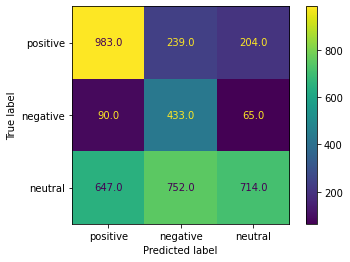

In [21]:
print(f1_score(y_val, y_pred, average='macro'))
print(accuracy_score(y_val, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred, labels=['positive', 'negative', 'neutral']),display_labels=['positive', 'negative', 'neutral']).plot(values_format='.1f')


              precision    recall  f1-score   support

    negative       0.30      0.74      0.43       588
     neutral       0.68      0.42      0.52      2113
    positive       0.59      0.57      0.58      1426

    accuracy                           0.52      4127
   macro avg       0.52      0.58      0.51      4127
weighted avg       0.59      0.52      0.53      4127


 Accuracy: 0.517



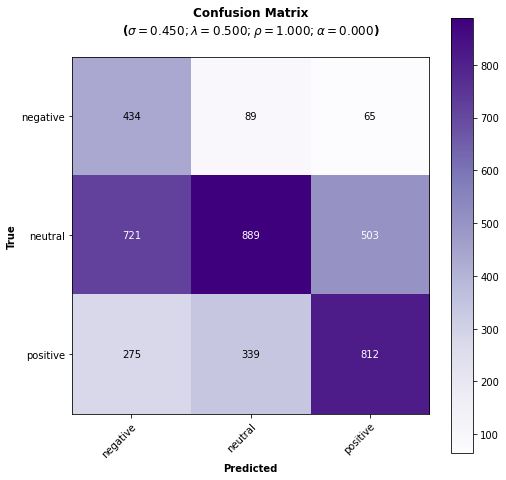

0.5090853292675019

In [22]:
Evaluation.test(clf, X_val, y_val, metric="f1-score")

In [0]:
n = 1
print(X_val[n])
print(clf.predict([X_val[n]]))
print(clf.predict_proba([X_val[n]]))
print('-----')
print(clf1.predict([X_val[n]]))
print(clf1.get_category_index('positive'))
print(clf1.predict_proba([X_val[n]]))
print('-----')
print(clf2.predict([X_val[n]]))
print(clf2.get_category_index('negative'))
print(clf2.predict_proba([X_val[n]]))

print('-----')
print(clf3.predict([X_val[n]]))
print(clf3.get_category_index('neutral'))
print(clf3.predict_proba([X_val[n]]))


print('TRUE LABEL')
print(y_val[n])


Classification: 100%|██████████| 1/1 [00:00<00:00, 579.40it/s]

do u think I should be telling Niall abt these ships instead . @NiallOfficial what are u doin tomorrow ? I want to show u some boats
['negative']
[[0.38881037798170387, 0.0017990900488784847, 0.2647007187255094]]
-----
['other']
1
[[0.4510720597801786, 0.2665069371485087]]
-----
['negative']
0
[[0.5197064134655386, 0.32550025343914074]]
-----
['other']
0
[[0.061738185197964084, 0.2198827213693066]]
TRUE LABEL
neutral


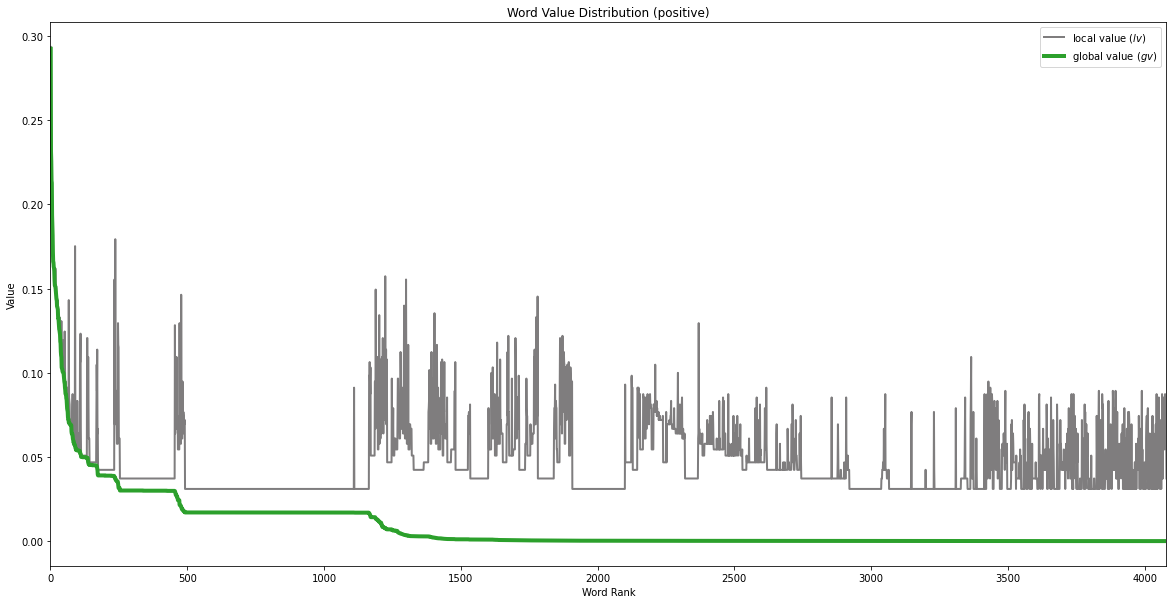

In [0]:
clf.plot_value_distribution('positive')

In [0]:
s_vals=0.45 
l_vals=span(0, 1, 11) 
p_vals=clf.get_p()
a_vals=clf.get_a()

In [0]:
best_s, best_l, best_p, best_a = Evaluation.grid_search(
    clf 
    ,X_val 
    ,y_val
    ,s=s_vals
    ,l=l_vals
    ,p=p_vals
    ,a=a_vals
    ,cache=False
    ,metric ="f1-score"
    ,n_grams = 5)

print('---------')

print(best_s, best_l, best_p, best_a)


Grid search: 100%|██████████| 11/11 [01:20<00:00,  7.31s/it]

---------
0.45 1.0 1.0 0.0
